# Курс Data Science
## Модуль 11.6 Трансформация входных данных для линейной регрессии

В алгоритмах машинного обучения и анализа данных часто встречаются требования к входным данным

* распределение данных (имеется в виду вероятностное распределение – например, гауссовское или пуассоновское)
* масштаб данных

Перед аналитиком часто стоит задача трансформации (преобразования) входных данных таким образом, чтобы удовлетворить условиям алгоритма. Игнорирование требований к входным данным приводит к некорректным выводам, это основной принцип ML (и не только ML): **garbage in - garbage out**.

**Важно**: трансформации можно применять как к фичам, так и к целевым переменным

В задачах линейной регрессии (и других линейных моделях, [например, SVM](https://ru.wikipedia.org/wiki/Метод_опорных_векторов ), о котором мы узнаем далее в курсе) такие трансформации особенно важны – чтобы линейная регрессия хорошо работала должны выполняться следующие требования:

* остатки регрессии (величины $y_i-\hat{y_i}$) должны иметь нормальное (гауссово) распределение (это можно проверить, например, построив гистограмму, как мы учились в модуле про matplotlib)
* все фичи должны быть примерно в одном масшабе

При подготовке данных для обучения линейной регрессии применяются следyющие приемы: масштабирование и нормализация.

Сначала давайте проверим, как преобразование входных данных может повлиять на метрики

---
### Логарифмирование

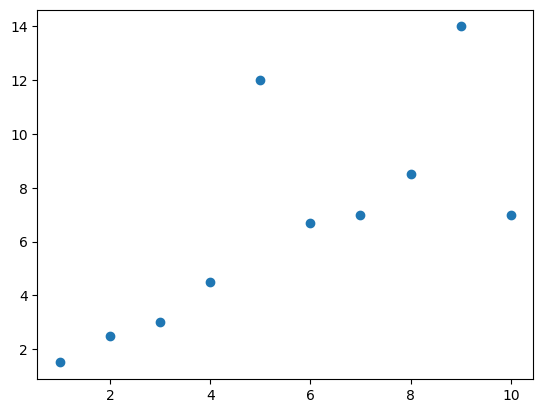

In [7]:
import numpy as np
from matplotlib import pyplot as  plt
%matplotlib inline

x = np.linspace(1, 10, num=10).reshape(-1,1)
y = [1.5, 2.5, 3, 4.5, 12, 6.7, 7, 8.5, 14, 7]

plt.scatter(x, y)
plt.show()

Видно, что данные вроде бы линейные, но есть выбросы. Обучим линейную регрессию на этом датасете и посмотрим, какой получился r2_score

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
reg = LinearRegression().fit(x, y)
y_pred = reg.predict(x)

print(r2_score(y, y_pred))

0.5221932366140851


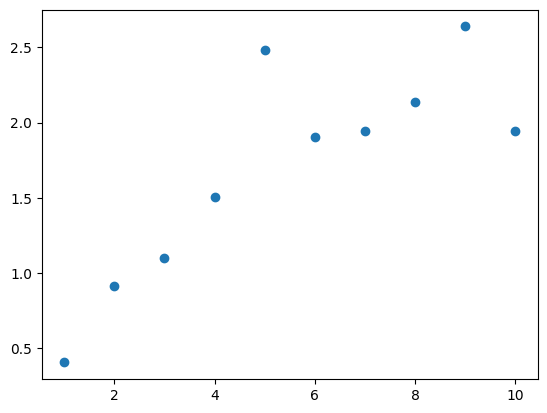

In [9]:
y_transformed = np.log(y)

plt.scatter(x, y_transformed)
plt.show()

Мы применили трансформацию нашей целевой переменной - число визуально кажется, будто точки стали плотнее друг к другу, логарифмирование сгладило выбросы. Давайте проверим нашу интуицию по изменению метрики.

In [10]:
reg = LinearRegression().fit(x, y_transformed)
y_pred = reg.predict(x)
print(r2_score(y_transformed, y_pred))

0.6775796066529154


Метрика $R^2$ увеличилась, значит наша модель стала лучше. Логарифмирование работает

Это чисто инженерные приёмы первичной обработки данных, для борьбы с большими по модулю значениями, которые являются выбросами обычно используют

* логарифмирование np.log
* извлечение квадратного корня np.sqrt

Оба этих преобразования являются *монотонными*, т.е. они меняют абсолютные значения, но сохраняют порядок величин.  
Пример немонотонного преобразования для  величины $x$ – функция $\sin x$

---
### z-score

Более интересный метод - это Standart Scaling или Z-score normalization. Это преобразование позволяет "сгладить" данные, избавить их от выбросов. Для этого инструмента [есть реализация в sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

raw_data = np.array([
    1.,  3.,  2.,  4.,  2., 10.,  2.,  5.,  2., 
    2.,  1.,  7.,  5.,  2.,  5., 16., 10.,  3., 24.],
    dtype=np.float32
)

print(f"Сырой датасет: {raw_data}")
transformed_data = StandardScaler().fit_transform(raw_data.reshape(-1, 1)).reshape(-1)
print(f"z-transform датасет: {transformed_data}")

Сырой датасет: [ 1.  3.  2.  4.  2. 10.  2.  5.  2.  2.  1.  7.  5.  2.  5. 16. 10.  3.
 24.]
z-transform датасет: [-0.7986022  -0.4497874  -0.6241948  -0.27538007 -0.6241948   0.7710641
 -0.6241948  -0.10097269 -0.6241948  -0.6241948  -0.7986022   0.24784204
 -0.10097269 -0.6241948  -0.10097269  1.8175085   0.7710641  -0.4497874
  3.2127674 ]


Мы видим, что в результате $z$-трансформации данные сместились в сторону нуля (появились как отрицательные значения, так и положительные) а так же уменьшился масштаб – данные похожи на нормальное (гауссовское) распределение)

---
### min-max normalization

Другой распространённый метод называется MinMax Scaling. Этот метод переносит все точки на отрезок [0;1]
$$
X_{scaled} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
$$

In [16]:
from sklearn.preprocessing import MinMaxScaler

print(f"Сырой датасет: {raw_data}")
transformed_data = MinMaxScaler().fit_transform(raw_data.reshape(-1, 1)).reshape(-1)
print(f"Min-Max scale датасет: {transformed_data}")

Сырой датасет: [ 1.  3.  2.  4.  2. 10.  2.  5.  2.  2.  1.  7.  5.  2.  5. 16. 10.  3.
 24.]
Min-Max scale датасет: [0.         0.08695652 0.04347826 0.13043478 0.04347826 0.39130437
 0.04347826 0.17391305 0.04347826 0.04347826 0.         0.2608696
 0.17391305 0.04347826 0.17391305 0.65217394 0.39130437 0.08695652
 1.        ]


Эта трансформация оцень полезна для визуализации данных – позволяет "ужать" точки в единичный отрезок и компактно отобразить их на графике. Полезна тем, что сохраняет относительные расстояния между точками (т.е. структуру датасета)

Как применять эти знания на практике? Используйте следующий алгоритм:

* построить модель
* вычислить метрику качества
* выполнить преобразования
* снова вычислить метрику качества
* если метрика качества выросла, применить найденную трансформацию ко входным данным перед тем, как подавать на вход модели